# Exercise notebook 4: Grouping your data
This Jupyter notebook, for Week 4 of The Open University's Learn to code for Data Analysis course, contains code examples and coding activities for you.
In Week 4, you'll come across steps directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete. Remember to run the code in this notebook before you start.

In [110]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default
%matplotlib inline

from pandas import *

In [111]:
LOCATION='comtrade_MK.csv'

In [112]:
vege = read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
vege.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2017,201701,January 2017,6,1,1,Imports,807,TFYR of Macedonia,...,NaN,NaN,NaN,NaN,95700,NaN,97782,NaN,NaN,0
1,HS,2017,201701,January 2017,6,1,1,Imports,807,TFYR of Macedonia,...,NaN,NaN,NaN,NaN,95700,NaN,97782,NaN,NaN,0
2,HS,2017,201702,February 2017,6,1,1,Imports,807,TFYR of Macedonia,...,NaN,NaN,NaN,NaN,435875,NaN,459363,NaN,NaN,0


In [113]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
vege = vege[COLUMNS]
vege_world = vege[vege['Partner'] == 'World']
vege_countries = vege[vege['Partner'] != 'World']

In [114]:
vege_countries.to_csv('countryvege.csv', index=False)
load_test = read_csv('countryvege.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2017,201701,Imports,TFYR of Macedonia,Netherlands,"Vegetables; seed potatoes, fresh or chilled",070110,97782
1,2017,201702,Imports,TFYR of Macedonia,Germany,"Vegetables; seed potatoes, fresh or chilled",070110,65890
2,2017,201702,Imports,TFYR of Macedonia,Netherlands,"Vegetables; seed potatoes, fresh or chilled",070110,393473
3,2017,201704,Imports,TFYR of Macedonia,Germany,"Vegetables; seed potatoes, fresh or chilled",070110,3017
4,2017,201704,Imports,TFYR of Macedonia,Netherlands,"Vegetables; seed potatoes, fresh or chilled",070110,60932


In [115]:
vege_imports = vege_countries[vege_countries['Trade Flow'] == 'Imports']
vege_countries_imports = vege_countries[vege_countries['Trade Flow'] == 'Imports']
vege_world_imports=vege_world[vege_world['Trade Flow'] == 'Imports']
vege_exports = vege_countries[vege_countries['Trade Flow'] == 'Exports']
vege_countries_exports = vege_countries[vege_countries['Trade Flow'] == 'Exports']
vege_world_exports=vege_world[vege_world['Trade Flow'] == 'Exports']

In [116]:
vegeImportsInJanuary2017 = vege_countries_imports[vege_countries_imports['Period'] == 201701]
vegeImportsInJanuary2017.sort('Trade Value (US$)',ascending=False).head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
1,2017,201701,Imports,TFYR of Macedonia,Netherlands,"Vegetables; seed potatoes, fresh or chilled",070110,97782
200,2017,201701,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,87310
81,2017,201701,Imports,TFYR of Macedonia,Serbia,"Onions, shallots, garlic, leeks and other alli...",0703,38297
11,2017,201701,Imports,TFYR of Macedonia,Greece,"Vegetables; tomatoes, fresh or chilled",070200,31720
14,2017,201701,Imports,TFYR of Macedonia,Turkey,"Vegetables; tomatoes, fresh or chilled",070200,23214


In [117]:
vegeExportsInJanuary2017 = vege_countries_exports[vege_countries_exports['Period'] == 201701]
vegeExportsInJanuary2017.sort('Trade Value (US$)',ascending=False).head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
13,2017,201701,Exports,TFYR of Macedonia,Russian Federation,"Vegetables; tomatoes, fresh or chilled",070200,123754
72,2017,201701,Exports,TFYR of Macedonia,Albania,"Onions, shallots, garlic, leeks and other alli...",0703,9275
78,2017,201701,Exports,TFYR of Macedonia,Montenegro,"Onions, shallots, garlic, leeks and other alli...",0703,1621
201,2017,201701,Exports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,270
179,2017,201701,Exports,TFYR of Macedonia,Serbia,"Vegetables; lettuce (lactuca sativa), (other t...",070519,153


# Total trade flow

In [118]:
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'

In [119]:
grouped = vege.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    25122275
Imports     6234451
Name: Trade Value (US$), dtype: int64

This shows a trade surplus of over 18 million dollars.

In [120]:
groupedim = vege_imports.groupby([PARTNER])
print('Macedonia imports from', len(groupedim), 'countries.')
print('The 5 biggest exporters to Macedonia are:')
totalImports = groupedim[VALUE].aggregate(sum).sort(inplace=False,ascending=False)
totalImports.head()

Macedonia imports from 20 countries.
The 5 biggest exporters to Macedonia are:


Partner
Albania        1219234
Netherlands     693190
Serbia          462759
Turkey          338851
Greece          124551
Name: Trade Value (US$), dtype: int64

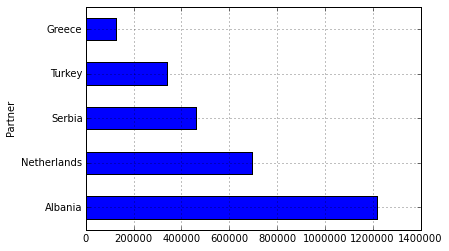

In [121]:
totalImports.head(5).plot(kind='barh')

In [122]:
groupedex = vege_exports.groupby([PARTNER])
print('Macedonia exports to', len(groupedex), 'countries.')
print('The 5 biggest importers to Macedonia are:')
totalExports = groupedex[VALUE].aggregate(sum).sort(inplace=False,ascending=False)
totalExports.head()

Macedonia exports to 17 countries.
The 5 biggest importers to Macedonia are:


Partner
Serbia                5067041
Russian Federation    4978408
Croatia                628787
Bosnia Herzegovina     537355
Montenegro             483222
Name: Trade Value (US$), dtype: int64

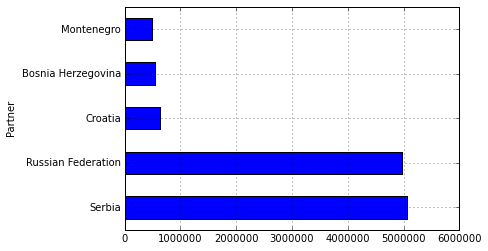

In [123]:
totalExports.head(5).plot(kind='barh')

## Regular 

In [124]:
def buysEveryMonth(group):
    return len(group) == 10

regular = groupedex.filter(buysEveryMonth)
regular


,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)


 There are no regular importers

In [125]:
regular = groupedim.filter(buysEveryMonth)
regular

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
65,2017,201706,Imports,TFYR of Macedonia,Serbia,"Vegetables; tomatoes, fresh or chilled",070200,15233
81,2017,201701,Imports,TFYR of Macedonia,Serbia,"Onions, shallots, garlic, leeks and other alli...",0703,38297
93,2017,201702,Imports,TFYR of Macedonia,Serbia,"Onions, shallots, garlic, leeks and other alli...",0703,85595
106,2017,201704,Imports,TFYR of Macedonia,Serbia,"Onions, shallots, garlic, leeks and other alli...",0703,47294
122,2017,201705,Imports,TFYR of Macedonia,Serbia,"Onions, shallots, garlic, leeks and other alli...",0703,2596
200,2017,201701,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,87310
206,2017,201702,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,79981
213,2017,201704,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,84105
218,2017,201705,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,18110
223,2017,201706,Imports,TFYR of Macedonia,Serbia,"Vegetables, root; carrots and turnips, fresh o...",070610,4238


In [126]:
regular[VALUE].sum() / vege_imports[VALUE].sum()

0.14845227676933065

 Serbia is a regular exporter with less than 15% of total imports in 2017

# Bi-directional trade

In [127]:
countries = pivot_table(vege_countries, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Albania,64034,1219234
Bosnia Herzegovina,537355,3270
Croatia,628787,9044
Greece,7117,124551
Poland,161835,12446
Rep. of Moldova,44,3885
Russian Federation,4978408,67818
Serbia,5067041,462759
Slovenia,118487,19260


# Detailed analysis

In [128]:
report = pivot_table(vege_countries,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

report.sort('Imports', ascending=False).head(20)

Trade Flow                                                                  Exports  \
Year Partner            Commodity                                                     
2017 Albania            Vegetables; tomatoes, fresh or chilled                  NaN   
     Netherlands        Vegetables; seed potatoes, fresh or chilled             NaN   
     Turkey             Vegetables; tomatoes, fresh or chilled                  NaN   
     Serbia             Vegetables, root; carrots and turnips, fresh or...     9853   
                        Onions, shallots, garlic, leeks and other allia...   428497   
     Netherlands        Onions, shallots, garlic, leeks and other allia...      NaN   
     Greece             Vegetables; tomatoes, fresh or chilled                 7117   
     Germany            Vegetables; seed potatoes, fresh or chilled             NaN   
     Russian Federation Vegetables; tomatoes, fresh or chilled              4959875   
     China              Onions, shallots, garlic, leeks and other allia...      NaN   
                        Vegetables, alliaceous; garlic, fresh or chilled        NaN   
     Slovenia           Vegetables; tomatoes, fresh or chilled               116274   
     Italy              Vegetables; tomatoes, fresh or chilled                  NaN   
     Serbia             Vegetables; tomatoes, fresh or chilled              4627590   
     Albania            Onions, shallots, garlic, leeks and other allia...    37538   
     Poland             Onions, shallots, garlic, leeks and other allia...   161835   
     Albania            Vegetables, root; carrots and turnips, fresh or...      NaN   
     Croatia            Onions, shallots, garlic, leeks and other allia...   293010   
     France             Onions, shallots, garlic, leeks and other allia...      NaN   
     Spain              Vegetables; lettuce (lactuca sativa), (other th...      NaN   

Trade Flow                                                                  Imports  
Year Partner            Commodity                                                    
2017 Albania            Vegetables; tomatoes, fresh or chilled              1195145  
     Netherlands        Vegetables; seed potatoes, fresh or chilled          552187  
     Turkey             Vegetables; tomatoes, fresh or chilled               335123  
     Serbia             Vegetables, root; carrots and turnips, fresh or...   273744  
                        Onions, shallots, garlic, leeks and other allia...   173782  
     Netherlands        Onions, shallots, garlic, leeks and other allia...   138730  
     Greece             Vegetables; tomatoes, fresh or chilled               121324  
     Germany            Vegetables; seed potatoes, fresh or chilled           68907  
     Russian Federation Vegetables; tomatoes, fresh or chilled                67818  
     China              Onions, shallots, garlic, leeks and other allia...    24603  
                        Vegetables, alliaceous; garlic, fresh or chilled      24603  
     Slovenia           Vegetables; tomatoes, fresh or chilled                19260  
     Italy              Vegetables; tomatoes, fresh or chilled                19253  
     Serbia             Vegetables; tomatoes, fresh or chilled                15233  
     Albania            Onions, shallots, garlic, leeks and other allia...    12504  
     Poland             Onions, shallots, garlic, leeks and other allia...    12446  
     Albania            Vegetables, root; carrots and turnips, fresh or...    11508  
     Croatia            Onions, shallots, garlic, leeks and other allia...     9044  
     France             Onions, shallots, garlic, leeks and other allia...     8751  
     Spain              Vegetables; lettuce (lactuca sativa), (other th...     7328

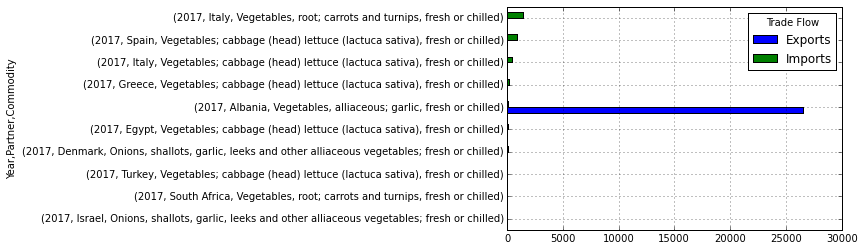

In [129]:
report.sort('Imports').head(10).plot(kind='barh')

Тhe total value by partner country of each commodity type (with each row corresponding to a particular country)

In [130]:
report1 = pivot_table(vege_countries,
               index=['Partner'],
               columns='Commodity',
               values='Trade Value (US$)',
               aggfunc=sum)

report1.head(5)

Commodity,"Onions, shallots, garlic, leeks and other alliaceous vegetables; fresh or chilled","Vegetables, alliaceous; garlic, fresh or chilled","Vegetables, root; carrots and turnips, fresh or chilled","Vegetables; cabbage (head) lettuce (lactuca sativa), fresh or chilled","Vegetables; lettuce (lactuca sativa), (other than cabbage lettuce), fresh or chilled","Vegetables; seed potatoes, fresh or chilled","Vegetables; tomatoes, fresh or chilled"
Partner,,,,,,,
Albania,50042,26573,11508,NaN,NaN,NaN,1195145
Belarus,80979,NaN,NaN,NaN,NaN,NaN,14166
Bosnia Herzegovina,73042,NaN,NaN,NaN,NaN,NaN,467583
Bulgaria,9197,NaN,NaN,NaN,28,NaN,313584
China,24603,24603,NaN,NaN,NaN,NaN,NaN


In [131]:
#the total value of trade in commodity type for each month of the year
report2 = pivot_table(vege_countries,
               index=['Period'],
               columns='Commodity',
               values='Trade Value (US$)',
               aggfunc=sum)

report2.head(10)

Commodity,"Onions, shallots, garlic, leeks and other alliaceous vegetables; fresh or chilled","Vegetables, alliaceous; garlic, fresh or chilled","Vegetables, root; carrots and turnips, fresh or chilled","Vegetables; cabbage (head) lettuce (lactuca sativa), fresh or chilled","Vegetables; lettuce (lactuca sativa), (other than cabbage lettuce), fresh or chilled","Vegetables; seed potatoes, fresh or chilled","Vegetables; tomatoes, fresh or chilled"
Period,,,,,,,
201701,97555,5210,88539,193,3505,97782,196274
201702,251644,4554,80376,729,3700,459363,380467
201704,385711,13338,86425,352,3600,63949,1778454
201705,427984,4106,24669,728,3297,NaN,5304392
201706,371227,24890,16557,46,2495,NaN,5496255


In [132]:
#the leading partners associated with the Vegetables; tomatoes, fresh or chilled commodity 
KEYCOMMODITY = ['Vegetables; tomatoes, fresh or chilled']
vege_countries_tomato = vege_countries[vege_countries['Commodity'].isin(KEYCOMMODITY)]

report3 = pivot_table(vege_countries_tomato,
               index=['Partner'],
               columns='Commodity',
               values='Trade Value (US$)',
               aggfunc=sum)

report3.head(10)

Commodity,"Vegetables; tomatoes, fresh or chilled"
Partner,
Albania,1195145
Belarus,14166
Bosnia Herzegovina,467583
Bulgaria,313584
Croatia,335777
Greece,128441
Italy,19253
Latvia,9662
Montenegro,459361


In [133]:
#the trade value, by month and commodity type, for Albania.
KEYPARTNER = ['Albania']
vege_countries_tomato_AL = vege_countries_tomato[vege_countries_tomato['Partner'].isin(KEYPARTNER)]

report4 = pivot_table(vege_countries_tomato_AL,
               index=['Partner' , 'Period'],
               columns='Commodity',
               values='Trade Value (US$)',
               aggfunc=sum)

report4.head(10)

Commodity       Vegetables; tomatoes, fresh or chilled
Partner Period                                        
Albania 201701                                   15062
        201704                                  441106
        201705                                  733109
        201706                                    5868

# Conclusions
The vegetabeles trade of the Republic of Macedonia for 2017 was analysed in terms of which countries Macedonia mostly depends on for income (exports) and goods (imports). Over the period, Macedonia had a trade surplus of over 18 million US dollars.
Albania is the main partner, but it imported far less then the value that was exported to Macedonia.
    Macedonia exported to over 17 countries during the period, and imported from 20 countries, the main ones (top five by trade value) Albania, Belarus, Bosnia and Herzegovina, Bulgaria and China. Serbia and the Russian Federation are the main importers and Albania and The Netherlands are the main exporters to Republic of Macedonia.
Macedonia has bi-directional trade (i.e. both exports and imports) with 9 countries, although for some the trade value (in US dollars) is low.